In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data=pd.read_csv(r"C:\Users\Rohit\Desktop\Rohit 2\project\flipkart.csv")
data

,screen_name,created_at,text,in_reply_to_screen_name,retweeted_status_screen_name,user_description,source,lang,id
0,Flipkart,2021-07-04T06:42:37Z,All the Questions of the #FullOnBlockbusterCha...,NaN,NaN,India's favourite online shopping destination!...,Twitter for Android,en,1411576161360957440
1,Flipkart,2021-07-04T05:30:00Z,Make way for the newest blockbuster in town. P...,NaN,NaN,India's favourite online shopping destination!...,Twitter for Advertisers.,en,1411557886887698434
2,Flipkart,2021-07-04T04:00:00Z,The Last Question of this #FullOnBlockbusterCh...,NaN,NaN,India's favourite online shopping destination!...,Twitter for Advertisers.,en,1411535238828679172
3,Flipkart,2021-07-04T03:55:00Z,We hope you got the First One !!\n\nThe Second...,NaN,NaN,India's favourite online shopping destination!...,Twitter for Advertisers.,en,1411533978784260097
4,Flipkart,2021-07-04T03:50:00Z,Here's the first Question of the #FullOnBlockb...,NaN,NaN,India's favourite online shopping destination!...,Twitter for Advertisers.,en,1411532720446922752
...,...,...,...,...,...,...,...,...,...
3195,Flipkart,2018-08-31T12:39:07Z,5 cities. 1 Fashion Capital.\nJoin Ira Dubey a...,NaN,NaN,India's favourite online shopping destination!...,Twitter Ads,en,1035507273349713920
3196,Flipkart,2018-08-31T10:42:36Z,"RT @Flipkart: Friends that stick together, are...",NaN,Flipkart,India's favourite online shopping destination!...,Twitter Web Client,en,1035477953210208257
3197,Flipkart,2018-08-31T09:42:07Z,RT @Flipkart: We couldn’t come up with a tagli...,NaN,Flipkart,India's favourite online shopping destination!...,Twitter Web Client,en,1035462728251572224
3198,Flipkart,2018-08-31T08:49:05Z,"Friends that stick together, are a hit togethe...",NaN,NaN,India's favourite online shopping destination!...,Twitter for Advertisers.,en,1035449381892366337


In [3]:
data.isnull().sum()

screen_name                        0
created_at                         0
text                               0
in_reply_to_screen_name         2429
retweeted_status_screen_name    2576
user_description                   0
source                             0
lang                              53
id                                 0
dtype: int64

In [4]:
data_1=data.copy()
data_1=data_1.drop(columns=["in_reply_to_screen_name","retweeted_status_screen_name"])

In [5]:
data_1["lang"].fillna("en",inplace=True)

In [6]:
data_1.isnull().sum()

screen_name         0
created_at          0
text                0
user_description    0
source              0
lang                0
id                  0
dtype: int64

In [7]:
data_1=pd.DataFrame(data_1.text)
data_1.head()

,text
0,All the Questions of the #FullOnBlockbusterCha...
1,Make way for the newest blockbuster in town. P...
2,The Last Question of this #FullOnBlockbusterCh...
3,We hope you got the First One !!\n\nThe Second...
4,Here's the first Question of the #FullOnBlockb...


In [8]:
data_1.iloc[417,0]

'Begin #2021 with the selection of nothing but the best. Get super rewards on Bounce, Vedantu, Epic On, and more with your SuperCoins. Visit the SuperCoin Zone on Flipkart App to know more.'

In [9]:
data_1.text=data_1.text.str.lower()

In [10]:
data_1.iloc[417,0]

'begin #2021 with the selection of nothing but the best. get super rewards on bounce, vedantu, epic on, and more with your supercoins. visit the supercoin zone on flipkart app to know more.'

In [11]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
def remove_punctuation(text):
    text_nopunt="".join([c for c in text if c not in string.punctuation])
    return text_nopunt

In [13]:
data_1['text']=data_1['text'].apply(lambda x : remove_punctuation(x))
data_1.iloc[417,0]

'begin 2021 with the selection of nothing but the best get super rewards on bounce vedantu epic on and more with your supercoins visit the supercoin zone on flipkart app to know more'

In [14]:
data_1['text'] = data_1['text'].str.replace(r'http\S+|www.\S+','',case=False)
data_1.iloc[417,0]

'begin 2021 with the selection of nothing but the best get super rewards on bounce vedantu epic on and more with your supercoins visit the supercoin zone on flipkart app to know more'

In [15]:
data_1['text'] = data_1['text'].str.replace('\d+','')
data_1.iloc[417,0]

'begin  with the selection of nothing but the best get super rewards on bounce vedantu epic on and more with your supercoins visit the supercoin zone on flipkart app to know more'

In [16]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
data_1['text'] = data_1['text'].apply(lambda x: ' '.join([word for word in x.split() 
                                                      if word not in (stop)]))
data_1.iloc[417,0]

'begin selection nothing best get super rewards bounce vedantu epic supercoins visit supercoin zone flipkart app know'

In [18]:
import re 
nltk.download('words')  
words = set(nltk.corpus.words.words())
words

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


{'unheretical',
 'parricidism',
 'superpose',
 'teamland',
 'zootechny',
 'butteris',
 'severingly',
 'phylactocarp',
 'cycledom',
 'dishouse',
 'rhododendron',
 'anthozoan',
 'heliotherapy',
 'prolepsis',
 'ballistic',
 'excusably',
 'noneclipsing',
 'Troytown',
 'cystitis',
 'Chytridiaceae',
 'fay',
 'Armeriaceae',
 'neolith',
 'conscionably',
 'presentable',
 'fistulize',
 'gonepoiesis',
 'mousehawk',
 'Koelreuteria',
 'colorectitis',
 'rotulad',
 'incorruptible',
 'valor',
 'garlicwort',
 'photoelectrically',
 'overdriven',
 'acerbity',
 'frillback',
 'Aotea',
 'deliberatively',
 'hypergamy',
 'poetize',
 'halohydrin',
 'thermite',
 'bimodal',
 'reliantly',
 'antimoral',
 'Fragaria',
 'peripneumonia',
 'firca',
 'unwithheld',
 'infusile',
 'falconbill',
 'pewterer',
 'synchronizable',
 'dhabb',
 'apogenous',
 'Getic',
 'screenwriter',
 'lush',
 'biangular',
 'cornute',
 'branchiocardiac',
 'cyanhydrin',
 'untributary',
 'hitherto',
 'toyishly',
 'Flavia',
 'shrinelet',
 'purposive'

In [19]:
data_1.iloc[417,0]

'begin selection nothing best get super rewards bounce vedantu epic supercoins visit supercoin zone flipkart app know'

In [20]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w,"v") for w in w_tokenizer.tokenize(text)]

In [22]:
data_1['text'] = data_1.text.apply(lambda x :' '.join(lemmatize_text(x)))
data_1.iloc[417,0]

'begin selection nothing best get super reward bounce vedantu epic supercoins visit supercoin zone flipkart app know'

In [23]:
data_1['text'] = (data_1['text'].astype("str").str.rstrip())
data_1.iloc[417,0]

'begin selection nothing best get super reward bounce vedantu epic supercoins visit supercoin zone flipkart app know'

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_1_cv = cv.fit_transform(data_1.text)
data_1_dtm = pd.DataFrame(data_1_cv.toarray(), columns=cv.get_feature_names())

tdm = data_1_dtm.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,3190,3191,3192,3193,3194,3195,3196,3197,3198,3199
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaajkiraat,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaayokobo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aachinjain,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
tdm['freq'] = tdm.sum(axis=1)
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,3191,3192,3193,3194,3195,3196,3197,3198,3199,freq
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
aaaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
aaajkiraat,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
aaayokobo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
aachinjain,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,3191,3192,3193,3194,3195,3196,3197,3198,3199,freq
0,aa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,aaaa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,aaajkiraat,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,aaayokobo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,aachinjain,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
tdm1=tdm[["index","freq"]]
tdm1.rename(columns = {'index':'Word'}, inplace = True)
tdm1.sort_values(by='freq',ascending=False,inplace=True)
tdm1.head(20)

,Word,freq
2097,flipkart,1411
4186,offer,688
5139,rt,642
5683,special,532
656,bigbilliondays,511
6293,try,499
1796,emoji,484
5434,shop,433
6089,thebigbilliondays,391
238,amp,368


In [28]:
import seaborn as sns
w = tdm1[tdm1['freq']>=250]
fg = sns.factorplot(x='Word', y='freq',
                   size=4, aspect=2,
                   kind= 'bar',
                   data_1=w)

In [29]:
text = " ".join(review for review in data_1.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 324957 words in the combination of all review.


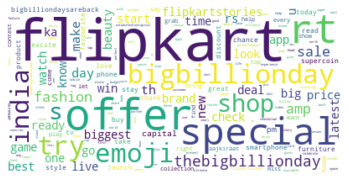

In [30]:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      collocations=False).generate(text)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
import os
os.chdir(r"C:\Users\Rohit\Desktop\Rohit 2\project")

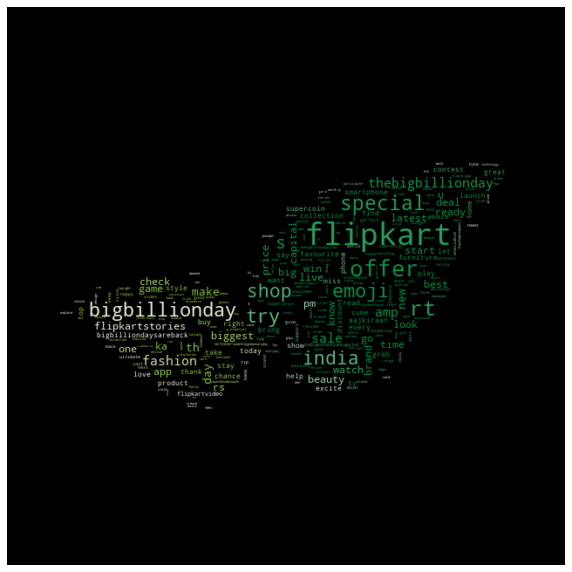

In [32]:

mask = np.array(Image.open("leaf.jpeg"))
wordcloud_full = WordCloud(stopwords=stopwords,background_color='black',
                           mode="RGBA",
                           max_words=30000,
                           mask=mask,
                           collocations=False).generate(text)


image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,15]) 
plt.imshow(wordcloud_full.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

In [33]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
data_1['polarity'] = data_1['text'].apply(pol)
data_1.head(10)

,text,polarity
0,question fullonblockbusterchallenge already li...,0.218182
1,make way newest blockbuster town present fullo...,0.116667
2,last question fullonblockbusterchallenge answe...,0.366667
3,hope get first one second question fullonblock...,0.337500
4,heres first question fullonblockbusterchalleng...,0.450000
5,ready fullonblockbusterchallenge answer questi...,0.325000
6,shes sassy shes savage shes funny shes cool sh...,0.300000
7,flipkarts buyback guarantee program offer guar...,0.000000
8,tear rulebook never easy nothing start scratch...,-0.040152
9,womenrun fulfilment centre coimbatore employ n...,0.033333


In [34]:
data_1['Sentiment'] = np.where(data_1['polarity']>=0, 'Positive', 'Negative')
data_1.head()

,text,polarity,Sentiment
0,question fullonblockbusterchallenge already li...,0.218182,Positive
1,make way newest blockbuster town present fullo...,0.116667,Positive
2,last question fullonblockbusterchallenge answe...,0.366667,Positive
3,hope get first one second question fullonblock...,0.337500,Positive
4,heres first question fullonblockbusterchalleng...,0.450000,Positive


In [35]:
data_1.Sentiment.value_counts()

Positive    2973
Negative     227
Name: Sentiment, dtype: int64

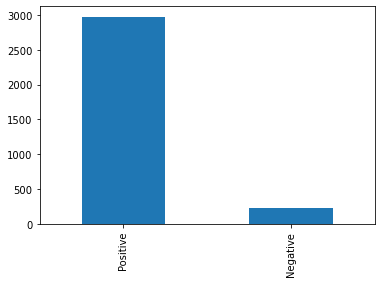

In [36]:
data_1.Sentiment.value_counts().plot.bar()